**Name: Eli Zard**


imports + load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow import keras

loading the dataset

In [2]:
(train_data, train_labels), (test_data, test_labels)  =  tfds.as_numpy(tfds.load(
    'eurosat',
    split=['train[:80%]', 'train[80%:]'],
    batch_size=-1,
    shuffle_files=True, 
    as_supervised=True
))

LABELS = [
'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/eurosat/rgb/2.0.0.incompleteI6CQDR/eurosat-train.tfrecord


  0%|          | 0/27000 [00:00<?, ? examples/s]

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


plotting fuction for the train/test acc,num_of_epoch 

In [3]:
def plot_results(h, xline=None):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h['loss'],'r', label='train')
    plt.plot(h['val_loss'],':r', label='test')
    if xline is not None:
        plt.axvline(x=xline, linestyle='--', color='k')
    plt.title('Loss',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(h['accuracy'],'b', label='train')
    plt.plot(h['val_accuracy'],':b', label='test')
    if xline is not None:
        plt.axvline(x=xline, linestyle='--', color='k')
    plt.title('Accuracy',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.legend()
    plt.grid()

creating my model

In [4]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64,64,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [5]:
model=createModel()

Epoch 1/20
338/338 [==============================] - 54s 66ms/step - loss: 1.4098 - accuracy: 0.6133 - val_loss: 3.2199 - val_accuracy: 0.4669
Epoch 2/20
338/338 [==============================] - 21s 63ms/step - loss: 0.8339 - accuracy: 0.7397 - val_loss: 2.3673 - val_accuracy: 0.4902
Epoch 3/20
338/338 [==============================] - 21s 63ms/step - loss: 0.6032 - accuracy: 0.8027 - val_loss: 1.1399 - val_accuracy: 0.6280
Epoch 4/20
338/338 [==============================] - 21s 63ms/step - loss: 0.4761 - accuracy: 0.8424 - val_loss: 1.0730 - val_accuracy: 0.6693
Epoch 5/20
338/338 [==============================] - 21s 63ms/step - loss: 0.4320 - accuracy: 0.8617 - val_loss: 1.1515 - val_accuracy: 0.7331
Epoch 6/20
338/338 [==============================] - 21s 63ms/step - loss: 0.3998 - accuracy: 0.8676 - val_loss: 1.7190 - val_accuracy: 0.5706
Epoch 7/20
338/338 [==============================] - 21s 63ms/step - loss: 0.3620 - accuracy: 0.8834 - val_loss: 1.0587 - val_accuracy:

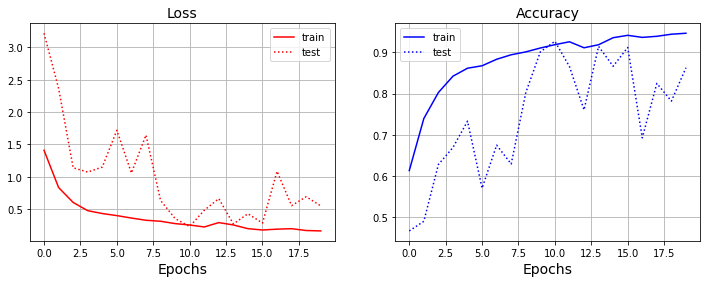

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

his=model.fit(train_data, train_labels, epochs=20, batch_size=64,validation_data=(test_data, test_labels), verbose=1)
model.summary()
plot_results(his.history)

using data augmentation to increase our acc
(taking each photo and making alot of photoes from it).

In [7]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.05),
  tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

loading vgg16 convnet
use it with transfer learning,fine tuning and data augmentation

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/20
338/338 [==============================] - 30s 77ms/step - loss: 2.9560 - accuracy: 0.7737 - val_loss: 0.7059 - val_accuracy: 0.8539
Epoch 2/20
338/338 [==============================] - 24s 71ms/step - loss: 0.7089 - accuracy: 0.8155 - val_loss: 0.5025 - val_accuracy: 0.8665
Epoch 3/20
338/338 [==============================] - 24s 71ms/step - loss: 0.6318 - accuracy: 0.8199 - val_loss: 0.4705 - val_accuracy: 0.8815
Epoch 4/20
338/338 [==============================] - 24s 71ms/step - loss: 0.5823 - accuracy: 0.8302 - val_loss: 0.4876 - val_accuracy: 0.8641
Epoch 5/20
338/338 [==============================] - 24s 70ms/step - loss: 0.5679 - accuracy: 0.8321 - val_loss: 0.4746 - val_accuracy: 0.8689
Epoch 6/20
338/338 [==============================] - 24s 70ms/step - loss: 0.5835 - accuracy: 0.8323 - val_loss: 0.4369 - val_accuracy: 0.8743
Epoch 7/20
338/338 [==============================] - 24s 70ms/step - l

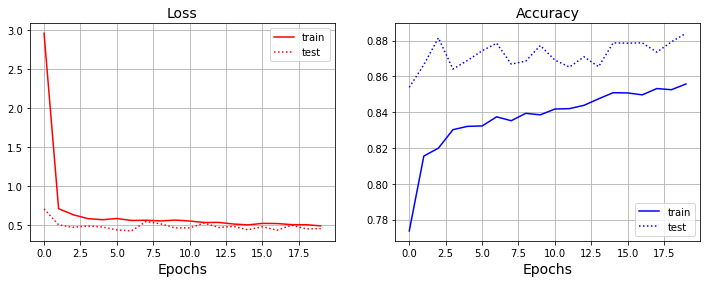

In [8]:
vgg16 = tf.keras.applications.VGG16(input_shape=(64,64,3),
                                               include_top=False,weights='imagenet')
vgg16.trainable=False

finalModel = Sequential()
finalModel.add(data_augmentation)
finalModel.add(vgg16) 
finalModel.add(Flatten())
finalModel.add(Dense(4096, activation='relu'))
finalModel.add(Dropout(.5))
finalModel.add(Dense(10, activation='softmax'))
finalModel.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

h=finalModel.fit(train_data, train_labels, epochs=20, batch_size=64,validation_data=(test_data, test_labels), verbose=1)
finalModel.summary()
plot_results(h.history)

unfreezing the layers in order to train the vgg weights to increase the acc and drop the LOSS

In [9]:
vgg16.trainable=True
for (i,layer) in enumerate(vgg16.layers):
    print(str(i),'\t', layer.__class__.__name__, '\t',layer.trainable)
opt = tf.keras.optimizers.Adam(lr=0.00001)
finalModel.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
h2=finalModel.fit(train_data, train_labels, epochs=10, batch_size=64,validation_data=(test_data, test_labels), verbose=1)

his = dict()
for k in h.history.keys():
    his[k] = h.history[k] + h2.history[k]

0 	 InputLayer 	 True
1 	 Conv2D 	 True
2 	 Conv2D 	 True
3 	 MaxPooling2D 	 True
4 	 Conv2D 	 True
5 	 Conv2D 	 True
6 	 MaxPooling2D 	 True
7 	 Conv2D 	 True
8 	 Conv2D 	 True
9 	 Conv2D 	 True
10 	 MaxPooling2D 	 True
11 	 Conv2D 	 True
12 	 Conv2D 	 True
13 	 Conv2D 	 True
14 	 MaxPooling2D 	 True
15 	 Conv2D 	 True
16 	 Conv2D 	 True
17 	 Conv2D 	 True
18 	 MaxPooling2D 	 True


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
338/338 [==============================] - 66s 186ms/step - loss: 0.4103 - accuracy: 0.8781 - val_loss: 0.3794 - val_accuracy: 0.9017
Epoch 2/10
338/338 [==============================] - 62s 183ms/step - loss: 0.2941 - accuracy: 0.9128 - val_loss: 0.3341 - val_accuracy: 0.9128
Epoch 3/10
338/338 [==============================] - 62s 183ms/step - loss: 0.2369 - accuracy: 0.9268 - val_loss: 0.2980 - val_accuracy: 0.9198
Epoch 4/10
338/338 [==============================] - 62s 183ms/step - loss: 0.2091 - accuracy: 0.9372 - val_loss: 0.4082 - val_accuracy: 0.8956
Epoch 5/10
338/338 [==============================] - 62s 183ms/step - loss: 0.1901 - accuracy: 0.9431 - val_loss: 0.4908 - val_accuracy: 0.8843
Epoch 6/10
338/338 [==============================] - 62s 183ms/step - loss: 0.1722 - accuracy: 0.9485 - val_loss: 0.2292 - val_accuracy: 0.9370
Epoch 7/10
338/338 [==============================] - 62s 183ms/step - loss: 0.1532 - accuracy: 0.9510 - val_loss: 0.3033 - val_ac

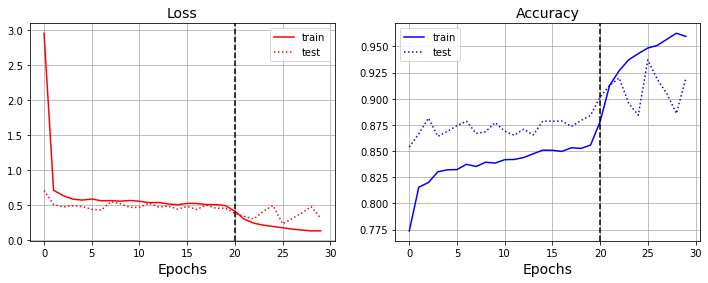

In [10]:
plot_results(his, xline=20)


***
###Summary

<table>
  <tr>
    <th>Model</th>
    <th>train loss</th>
    <th>test loss</th>
    <th>train accuracy</th>
    <th>test accuracy</th>
  </tr>
  <tr> 
    <td>My Model</td>   <!-- Model -->
    <td> 0.163</td> <!-- train loss -->
    <td> 0.551</td> <!-- test accuracy -->
    <td> 0.946</td>
    <td> 0.863</td>
  </tr>
  <tr> 
    <td>VGG-16 + fine tuning + transfer learning</td>   <!-- Model -->
    <td> 0.128</td> <!-- train loss -->
    <td>0.307</td> <!-- test accuracy -->
    <td>0.959</td>
    <td> 0.92</td>
  </tr>
</table>

acc test

Text(0.5, 1.0, 'Accuracy')

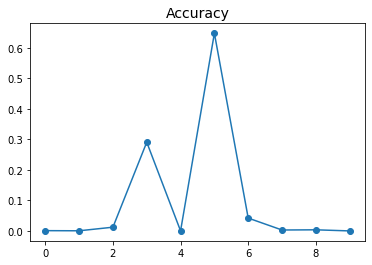

In [11]:
y_hat = finalModel.predict(test_data)
plt.plot(y_hat[1],'o-')
y_hat = np.argmax(y_hat, axis=1)
np.mean(test_labels == y_hat)
plt.title('Accuracy',fontsize=14)

confusion matrix

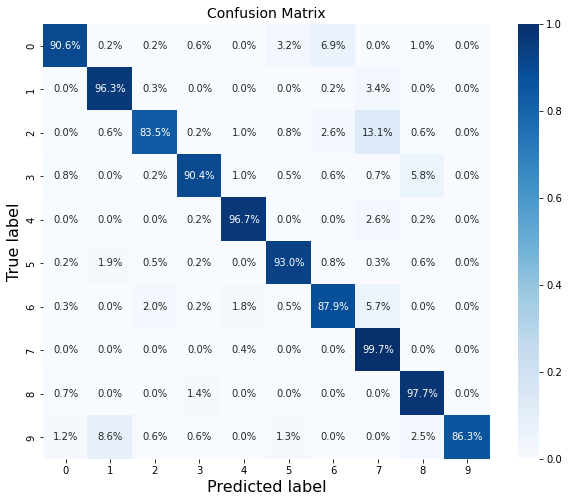

In [13]:
M = confusion_matrix(test_labels, y_hat)
CM = M / M.sum(axis=1) # normalize each row (to sum = 1)
plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.1%', vmin=0, vmax=1)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix',fontsize=14)
plt.show()

taking the one before last layer and plot the result with dimension reduction ( tsne + pca ) .

In [14]:
features_extractor = tf.keras.Model(inputs=finalModel.inputs, outputs=finalModel.layers[-2].output)
features = features_extractor.predict(test_data)
features.shape

(5400, 4096)

In [15]:
pca = PCA(n_components=150).fit(features)

features_150D = pca.transform(features)
features_150D.shape

(5400, 150)

In [16]:
features_tSNE = TSNE(n_components=2).fit_transform(features_150D)
features_tSNE.shape

(5400, 2)

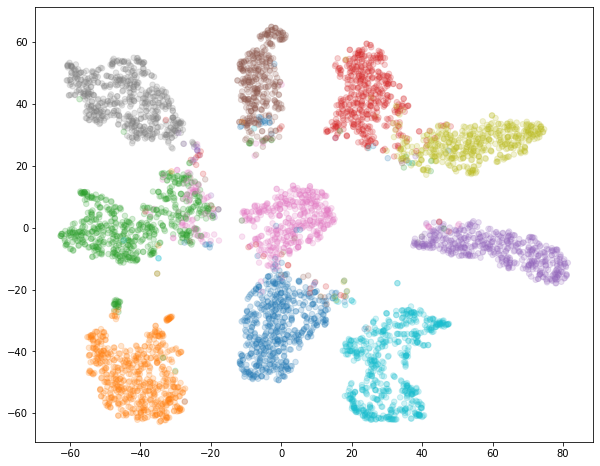

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(features_tSNE[:,0], features_tSNE[:,1], s=30, c=test_labels, cmap='tab10', alpha=0.2)
plt.show()

Cesarea Image

(704, 704, 3)

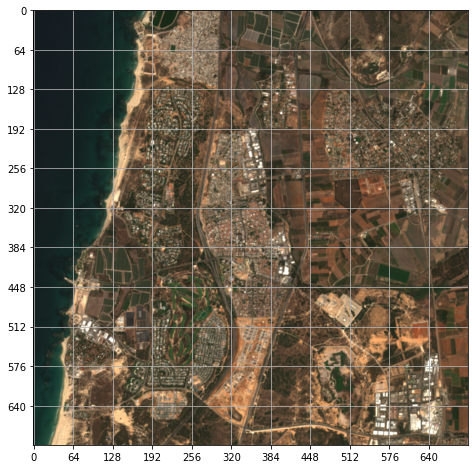

In [18]:
image=plt.imread('Cesarea.tiff')
plt.figure(figsize=(10,8))
plt.xticks(range(0,704,64))
plt.yticks(range(0,704,64))
plt.grid()
plt.imshow(image)

image.shape

in order to slice the image into patches i will use patchify

In [19]:
pip install patchify

In [20]:
from patchify import patchify

In [21]:
patch=patchify(image,(64,64,3),step=64)

plotting the new image and make a predict on each patch

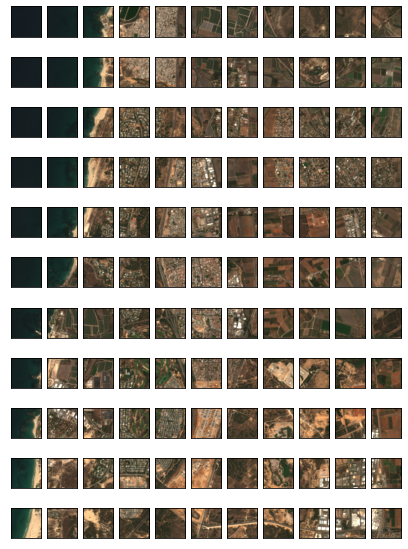

In [22]:
plt.figure(figsize=(7,10))
k=0
p=0
for i in range(11*11):
    plt.subplot(11,11,i+1)
    plt.imshow(patch[p][k][0])
    plt.xticks([])
    plt.yticks([])
    k+=1
    if(k>=11):
        k=0
        p+=1

In [23]:
temp = []
for i in range (11):
  for j in range (11):
    temp.append(finalModel.predict(patch[i][j]))

making a matrix NxN and take the highest score prediction and than plotting via imshow

In [24]:
val=np.zeros((11,11),dtype=int)
count=0
for i in range(11):
  for j in range(11):
    val[i][j] = np.argmax(temp[count],axis=None)
    count+=1
    

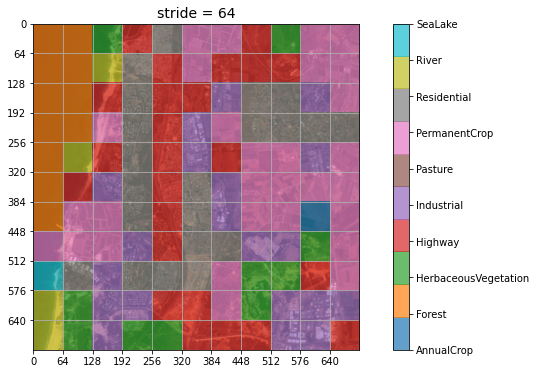

In [25]:
plt.figure(figsize=(12,6))
plt.imshow(image)
colormap = plt.imshow(val,alpha=.7, cmap="tab10",extent=[0,704,704,0])

cbar = plt.colorbar(colormap)
plt.xticks(range(0,704,64))
plt.yticks(range(0,704,64))
plt.grid()
plt.title('stride = 64',fontsize=14)
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
cbar.set_ticklabels(LABELS)


same method different stride

In [26]:
patch2 = patchify(image,(64,64,3),step=32)
patch2.shape

(21, 21, 1, 64, 64, 3)

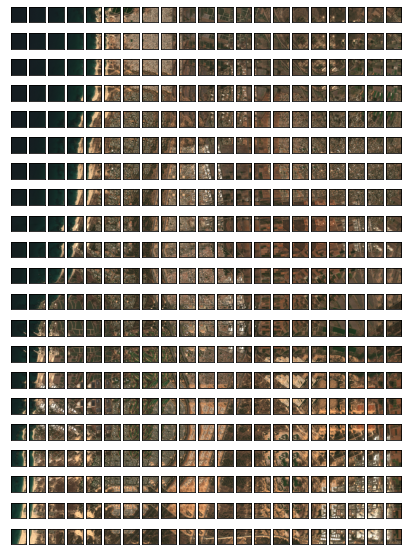

In [27]:
plt.figure(figsize=(7,10))
k=0
p=0
for i in range(21*21):
    plt.subplot(21,21,i+1)
    plt.imshow(patch2[p][k][0])
    plt.xticks([])
    plt.yticks([])
    k+=1
    if(k>=21):
        k=0
        p+=1

In [28]:
temp=[]
for i in range (21):
  for j in range (21):
    temp.append(finalModel.predict(patch2[i][j]))

In [29]:
val2=np.zeros((21,21),dtype=int)
count=0
for i in range(21):
  for j in range(21):
    val2[i][j] = np.argmax(temp[count],axis=None)
    count+=1
    

second plot stride = 32

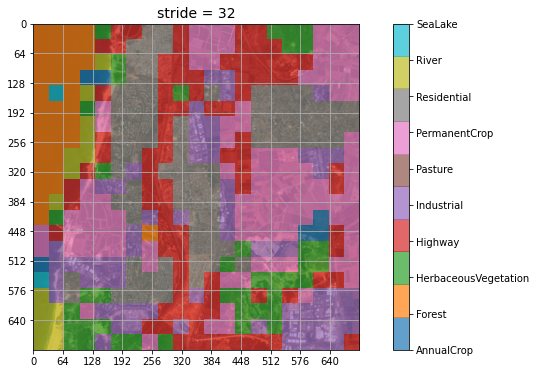

In [30]:
plt.figure(figsize=(12,6))
plt.imshow(image)
colormap = plt.imshow(val2,alpha=.7, cmap="tab10",extent=[0,704,704,0])

cbar = plt.colorbar(colormap)
plt.xticks(range(0,704,64))
plt.yticks(range(0,704,64))
plt.grid()
plt.title('stride = 32',fontsize=14)
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
cbar.set_ticklabels(LABELS)


In [31]:
patch3 = patchify(image,(64,64,3),step=8)
patch3.shape

(81, 81, 1, 64, 64, 3)

In [32]:
temp=np.zeros((81,81,10))
p=k=0
for i in range (81):
  for j in range(81):
    temp[i][j]=finalModel.predict(patch3[i][j])

In [33]:
val3=np.zeros((81,81),dtype=int)
count=0
for i in range(81):
  for j in range(81):
    val3[i][j] = np.argmax(temp[i][j],axis=None)
    count+=1
    

third plot stide = 8

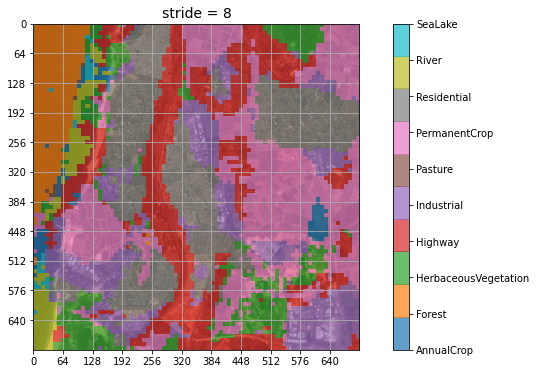

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(image)
colormap = plt.imshow(val3,alpha=.7, cmap="tab10",extent=[0,704,704,0])

cbar = plt.colorbar(colormap)
plt.xticks(range(0,704,64))
plt.yticks(range(0,704,64))
plt.grid()
plt.title('stride = 8',fontsize=14)
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
cbar.set_ticklabels(LABELS)


In [48]:
fil=temp.copy( )

func to find the most common element in a list

In [37]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

func to padd and filter the image by the majority of the colors next to the square I , J

In [38]:
def padding_filttering(mat,N):
  z=np.zeros((81+N*2,81+N*2))
  p=k=0
  for i in range(N,81+N):
    for j in range(N,81+N):
      z[i][j]=val3[p][k]
      k+=1
      if(k>=81):
        k=0
        p+=1
  zmax=np.zeros((81+N*2,81+N*2))
  for i in range(N+1,81+N-1):
    for j in range(N+1,81+N-1):
      temp=[]
      for k in range(-N,N+1):
        for t in range(-N,N+1):
         temp.append(z[i+k][j+t])
      zmax[i][j]=most_frequent(temp)
  return zmax
   

In [39]:
filter=padding_filttering(val3,3)

plotting the results

Text(0.5, 1.0, 'filtered image')

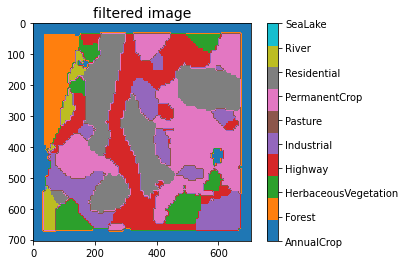

In [40]:
colormap = plt.imshow(filter,cmap='tab10',extent=[0,704,704,0])

cbar = plt.colorbar(colormap)

cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])

cbar.set_ticklabels(LABELS)
plt.title('filtered image',fontsize=14)

plotting the "heatmaps" of every filter

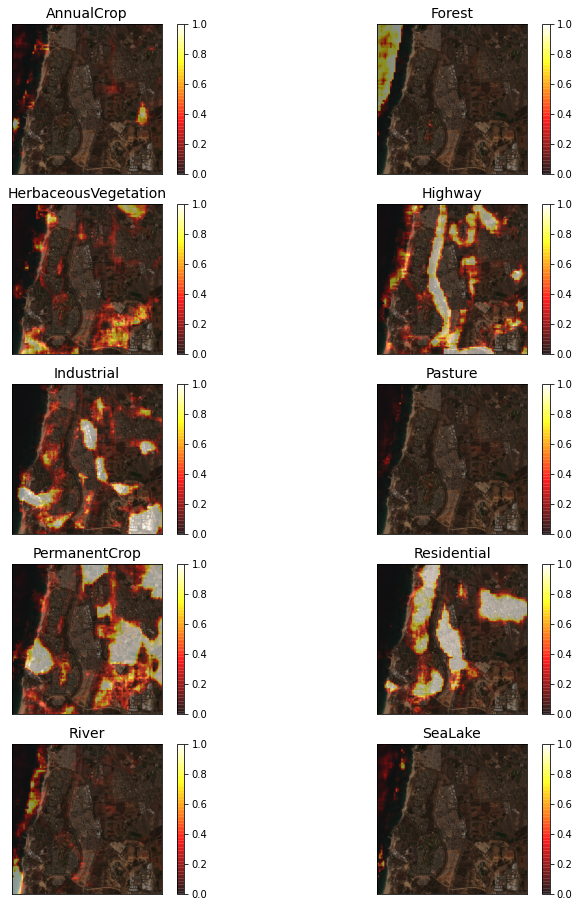

In [49]:
plt.figure(figsize=(12,16))
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(image)
  plt.imshow(fil[:,:,i],alpha=.5,cmap='hot',extent=[0,704,704,0],vmax=1)
  plt.yticks([])
  plt.xticks([])
  plt.title(LABELS[i],fontsize=14)
  plt.colorbar()